# tRacket - Data Loading from All Sensors

The purpose of this notebook is to load all available data form each device and save to disk for future analysis.

Happy exploring!

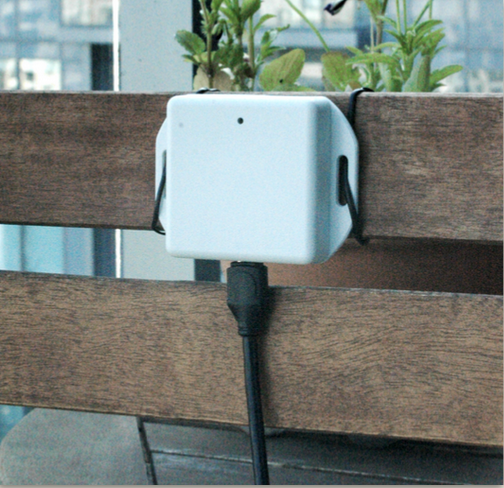

## Loading Locations

Let's get a list of all locations first:

In [1]:
import requests
import pandas as pd

In [3]:
location_url = "https://api.tracket.info/v1/locations"

locations = requests.get(location_url).json()
locations = pd.DataFrame(locations['locations'])

locations

,id,label,latitude,longitude,radius,active,lastChecked,latestTimestamp,hourStart,hourEnd,hourMin,hourMax,hourMean
0,572227,Scott St. & Wellington St.,43.648156,-79.376049,75.452213,True,2025-04-26T17:38:51-04:00,2024-07-06T14:03:00-04:00,2024-07-06T13:03:00-04:00,2024-07-06T14:03:00-04:00,2.000,5.000,2.555
1,572234,Ossington Ave & Dupont St,43.669501,-79.428834,84.156117,True,2025-04-26T17:38:52-04:00,2024-08-08T15:04:30-04:00,2024-08-08T14:04:30-04:00,2024-08-08T15:04:30-04:00,56.000,83.000,65.308
2,572250,Kingsley Ave & Symington Ave,43.668500,-79.452400,50.000000,True,2025-04-26T17:38:52-04:00,2024-03-27T17:54:30-04:00,2024-03-27T16:54:30-04:00,2024-03-27T17:54:30-04:00,46.343,68.077,47.263
3,637773,Scott St. & Wellington St.,43.648000,-79.376000,50.000000,False,0000-00-00T00:00:00-04:00,0000-00-00T00:00:00-04:00,0000-00-00T00:00:00-04:00,0000-00-00T00:00:00-04:00,0.000,0.000,0.000
4,664429,Bayview Ave & Sheppard Ave E,43.766600,-79.388000,50.000000,True,2025-04-26T17:38:52-04:00,2025-04-06T12:22:47-04:00,2025-04-06T11:22:47-04:00,2025-04-06T12:22:47-04:00,65.000,80.000,68.077
5,747559,Ossington & Dupont,43.669626,-79.428974,67.131135,True,2025-04-26T17:38:54-04:00,2025-02-14T06:38:43-04:00,2025-02-14T05:38:43-04:00,2025-02-14T06:38:43-04:00,34.000,38.000,34.231
6,747580,Ossington & Dupont (9),43.673224,-79.436632,15.000000,False,0000-00-00T00:00:00-04:00,0000-00-00T00:00:00-04:00,0000-00-00T00:00:00-04:00,0000-00-00T00:00:00-04:00,0.000,0.000,0.000
7,753346,Cosburn & Pape,43.689612,-79.347870,220.000000,False,0000-00-00T00:00:00-04:00,0000-00-00T00:00:00-04:00,0000-00-00T00:00:00-04:00,0000-00-00T00:00:00-04:00,0.000,0.000,0.000
8,753385,The Queensway and South Kingsway,43.635518,-79.473455,200.000000,False,0000-00-00T00:00:00-04:00,0000-00-00T00:00:00-04:00,0000-00-00T00:00:00-04:00,0000-00-00T00:00:00-04:00,0.000,0.000,0.000
9,756264,Dupont and Spadina,43.674757,-79.407054,50.000000,True,2025-04-26T17:38:55-04:00,2025-04-06T04:52:45-04:00,2025-04-06T03:52:45-04:00,2025-04-06T04:52:45-04:00,59.000,65.000,61.000


## Loading Noise Data

Next, we define a function that makes paginated calls to a given URL to load noise data:

In [5]:
def load_noise_data(sample_noise_url: str) -> pd.DataFrame:
  """
  Paginate call to the url to load noise data.
  Return results as a pandas DataFrame.
  """
  print(f"URL: {sample_noise_url}")

  page_num = 0

  print(f"Requesting at page {page_num}...", end=" ")
  noise_data = requests.get(sample_noise_url, params={'page': page_num}).json()
  noise_data = noise_data['measurements']
  print(f"Fetched {len(noise_data)} rows")


  all_noise_data = noise_data
  while len(noise_data) > 0:
    page_num += 1

    print(f"Requesting at page {page_num}...", end=" ")
    noise_data = requests.get(sample_noise_url, params={'page': page_num}).json()['measurements']
    print(f"Fetched {len(noise_data)} rows")

    if len(noise_data) > 0:
      all_noise_data.extend(noise_data)

  return pd.DataFrame(all_noise_data)

Let's test the function:

In [7]:
location_id = "1086619"
start_date = "2025-03-20"
end_date = "2025-03-26"

def build_url(location_id: str, start_date: str, end_date: str) -> str:
  """
  Create the API url to load noise data for a given location and time frame.
  """
  return f"https://api.tracket.info/v1/locations/{location_id}/noise?granularity=raw&start={start_date}&end={end_date}"

sample_noise_url = build_url(location_id, start_date, end_date)

load_noise_data(sample_noise_url)

URL: https://api.tracket.info/v1/locations/1086619/noise?granularity=raw&start=2025-03-20&end=2025-03-26
Requesting at page 0... Fetched 1000 rows
Requesting at page 1... Fetched 734 rows
Requesting at page 2... Fetched 0 rows


,timestamp,min,max,mean
0,2025-03-19T20:00:47-04:00,55,78,66
1,2025-03-19T20:05:47-04:00,55,71,64
2,2025-03-19T20:10:47-04:00,55,72,63
3,2025-03-19T20:15:47-04:00,53,85,65
4,2025-03-19T20:20:47-04:00,55,74,63
...,...,...,...,...
1729,2025-03-25T19:35:47-04:00,56,74,65
1730,2025-03-25T19:40:47-04:00,49,75,64
1731,2025-03-25T19:45:47-04:00,53,72,64
1732,2025-03-25T19:50:47-04:00,53,77,66


Now, we are ready to loop through the sensor IDs and load data for all.

In [19]:
import os

start_date = "2025-03-20"
end_date = "2025-03-26"

data_folder = "./noise_data"
os.makedirs(data_folder, exist_ok=True)

def build_file_path(data_folder: str, location_id: str, start_date: str, end_date: str) -> str:
  """
  Create the file path to save noise data for a given location and time frame.
  """
  return os.path.join(
      data_folder,
      f"noise_data_id_{location_id}_start_{start_date}_end_{end_date}.csv"
      )

for id in locations['id']:
  print(f"Loading data for location {id}...")
  sample_noise_url = build_url(id, start_date, end_date)
  noise_data = load_noise_data(sample_noise_url)

  if len(noise_data) > 0:
    file_path = build_file_path(data_folder, id, start_date, end_date)
    print(f"Saving data at {file_path}...")
    noise_data.to_csv(file_path, index=False)

  else:
    print("No data to save")

  print("\n\n")

Loading data for location 572227...
URL: https://api.tracket.info/v1/locations/572227/noise?granularity=raw&start=2025-03-20&end=2025-03-26
Requesting at page 0... Fetched 0 rows
No data to save



Loading data for location 572234...
URL: https://api.tracket.info/v1/locations/572234/noise?granularity=raw&start=2025-03-20&end=2025-03-26
Requesting at page 0... Fetched 0 rows
No data to save



Loading data for location 572250...
URL: https://api.tracket.info/v1/locations/572250/noise?granularity=raw&start=2025-03-20&end=2025-03-26
Requesting at page 0... Fetched 0 rows
No data to save



Loading data for location 637773...
URL: https://api.tracket.info/v1/locations/637773/noise?granularity=raw&start=2025-03-20&end=2025-03-26
Requesting at page 0... Fetched 0 rows
No data to save



Loading data for location 664429...
URL: https://api.tracket.info/v1/locations/664429/noise?granularity=raw&start=2025-03-20&end=2025-03-26
Requesting at page 0... Fetched 1000 rows
Requesting at page 1... Fe

Let's sanity check one of the files we saved:

In [21]:
file_path = os.path.join(
    data_folder,
    os.listdir(data_folder)[0]
)

pd.read_csv(file_path)

,timestamp,min,max,mean
0,2025-03-19T20:03:13-04:00,73,84,76
1,2025-03-19T20:08:13-04:00,73,82,75
2,2025-03-19T20:13:13-04:00,73,77,75
3,2025-03-19T20:18:13-04:00,73,79,75
4,2025-03-19T20:23:13-04:00,72,83,75
...,...,...,...,...
1748,2025-03-25T19:38:13-04:00,74,82,76
1749,2025-03-25T19:43:13-04:00,74,85,78
1750,2025-03-25T19:48:13-04:00,74,89,78
1751,2025-03-25T19:53:13-04:00,74,88,78
